In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

C:\Users\fuzel1999\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
boston = load_boston()

CRIM --------    per capita crime rate by town<br>
ZN   --------    proportion of residential land zoned for lots over 25,000 sq.ft.<br>
INDUS -------    proportion of non-retail business acres per town<br>
CHAS --------    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
NOX  --------    nitric oxides concentration (parts per 10 million)<br>
RM  --------     average number of rooms per dwelling<br>
AGE --------     proportion of owner-occupied units built prior to 1940<br>
DIS  -------     weighted distances to five Boston employment centres<br>
RAD  --------    index of accessibility to radial highways<br>
TAX  --------    full-value property-tax rate per 10,000 dollars<br>
PTRATIO -------  pupil-teacher ratio by town<br>
B  --------      1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
LSTAT --------   % lower status of the population<br>
MEDV --------    Median value of owner-occupied homes in $1000's

In [4]:
X = pd.DataFrame(boston.data,columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = pd.DataFrame(boston["target"],columns=["MEDV"])
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
data = X
data["MEDV"] = y
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


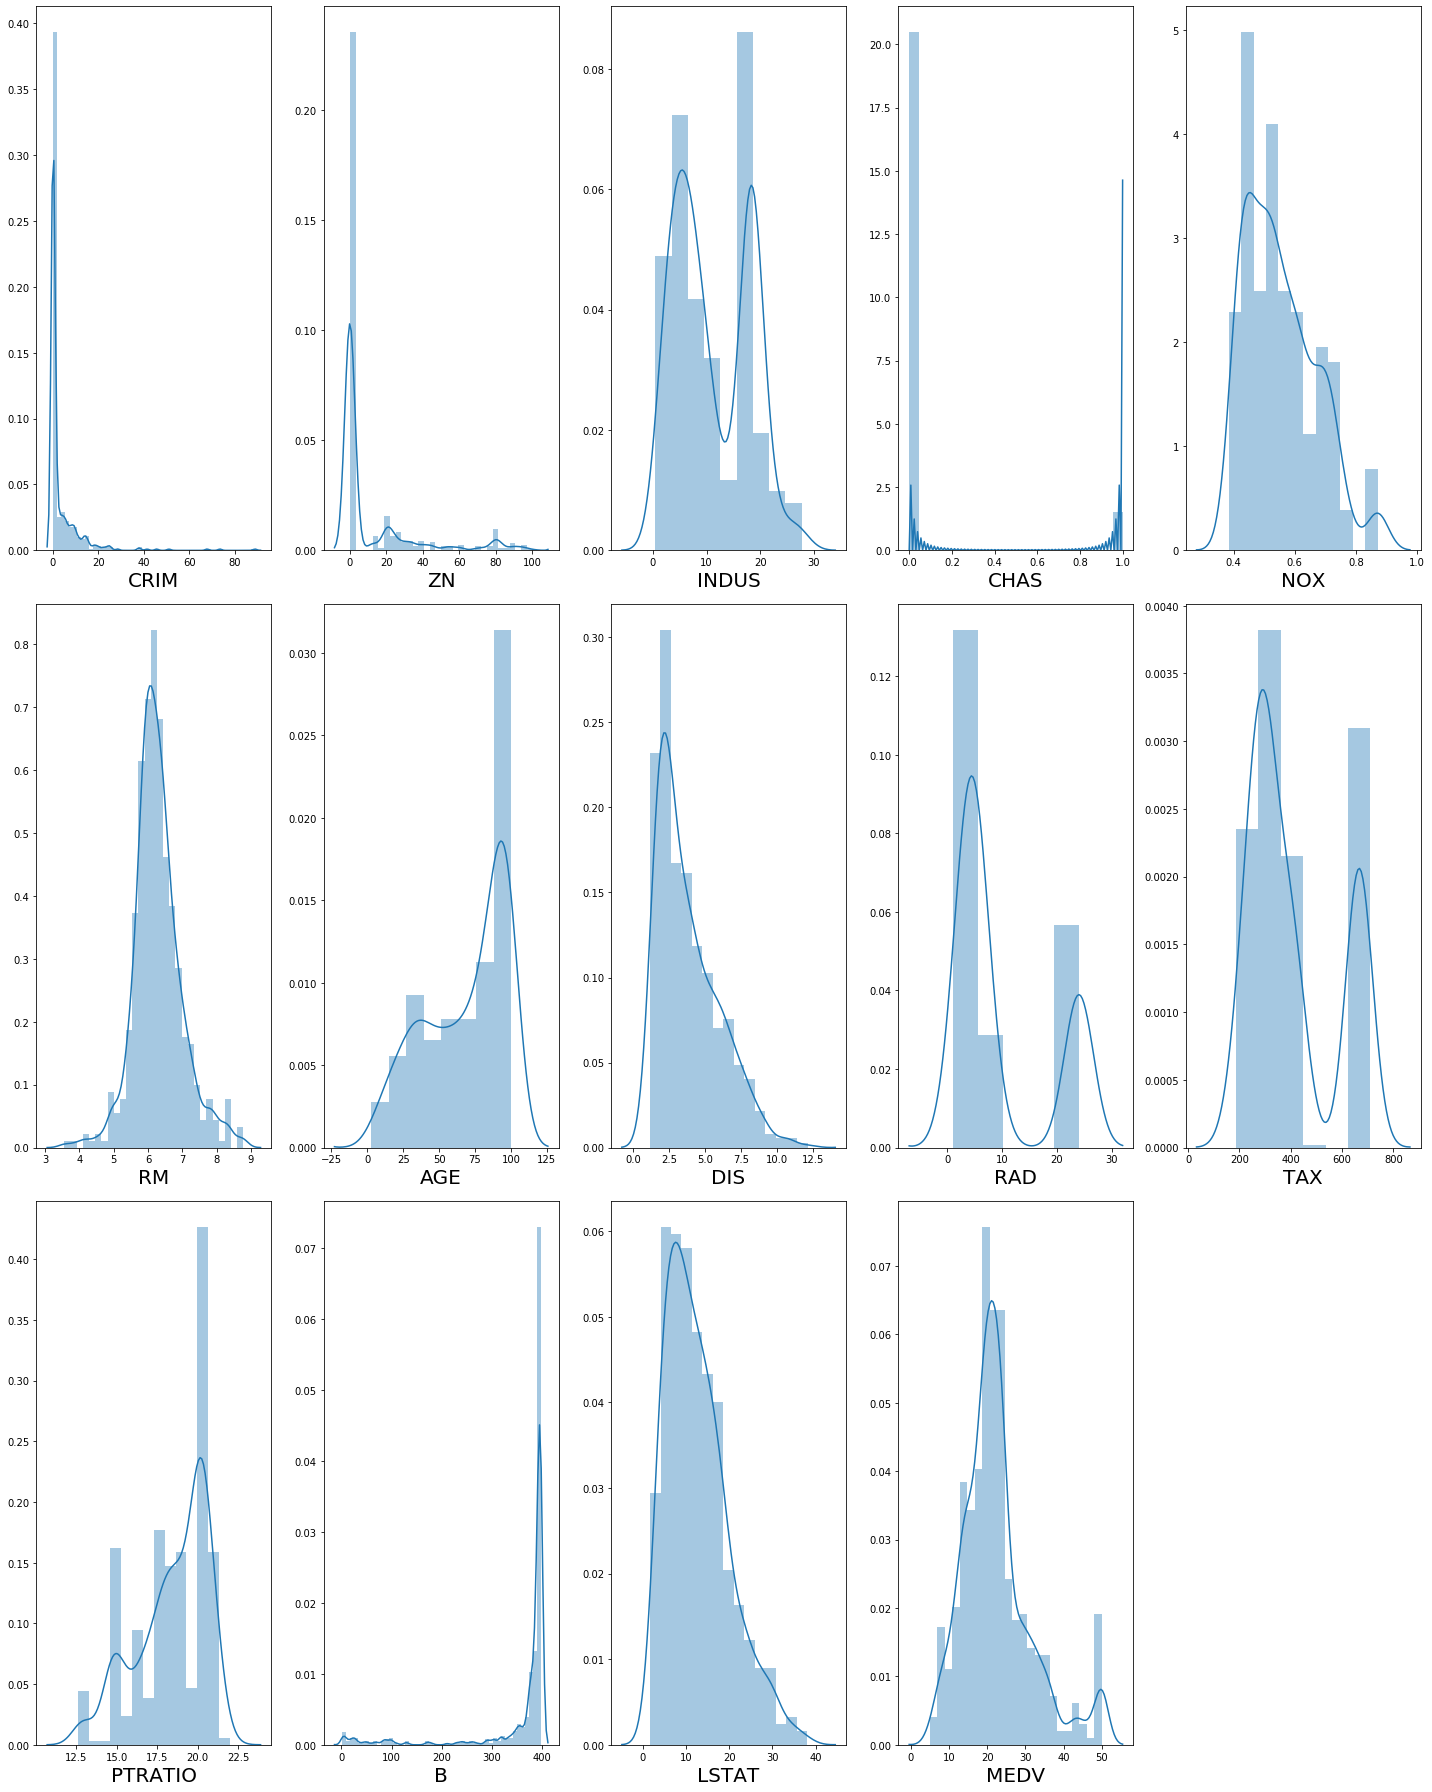

In [8]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


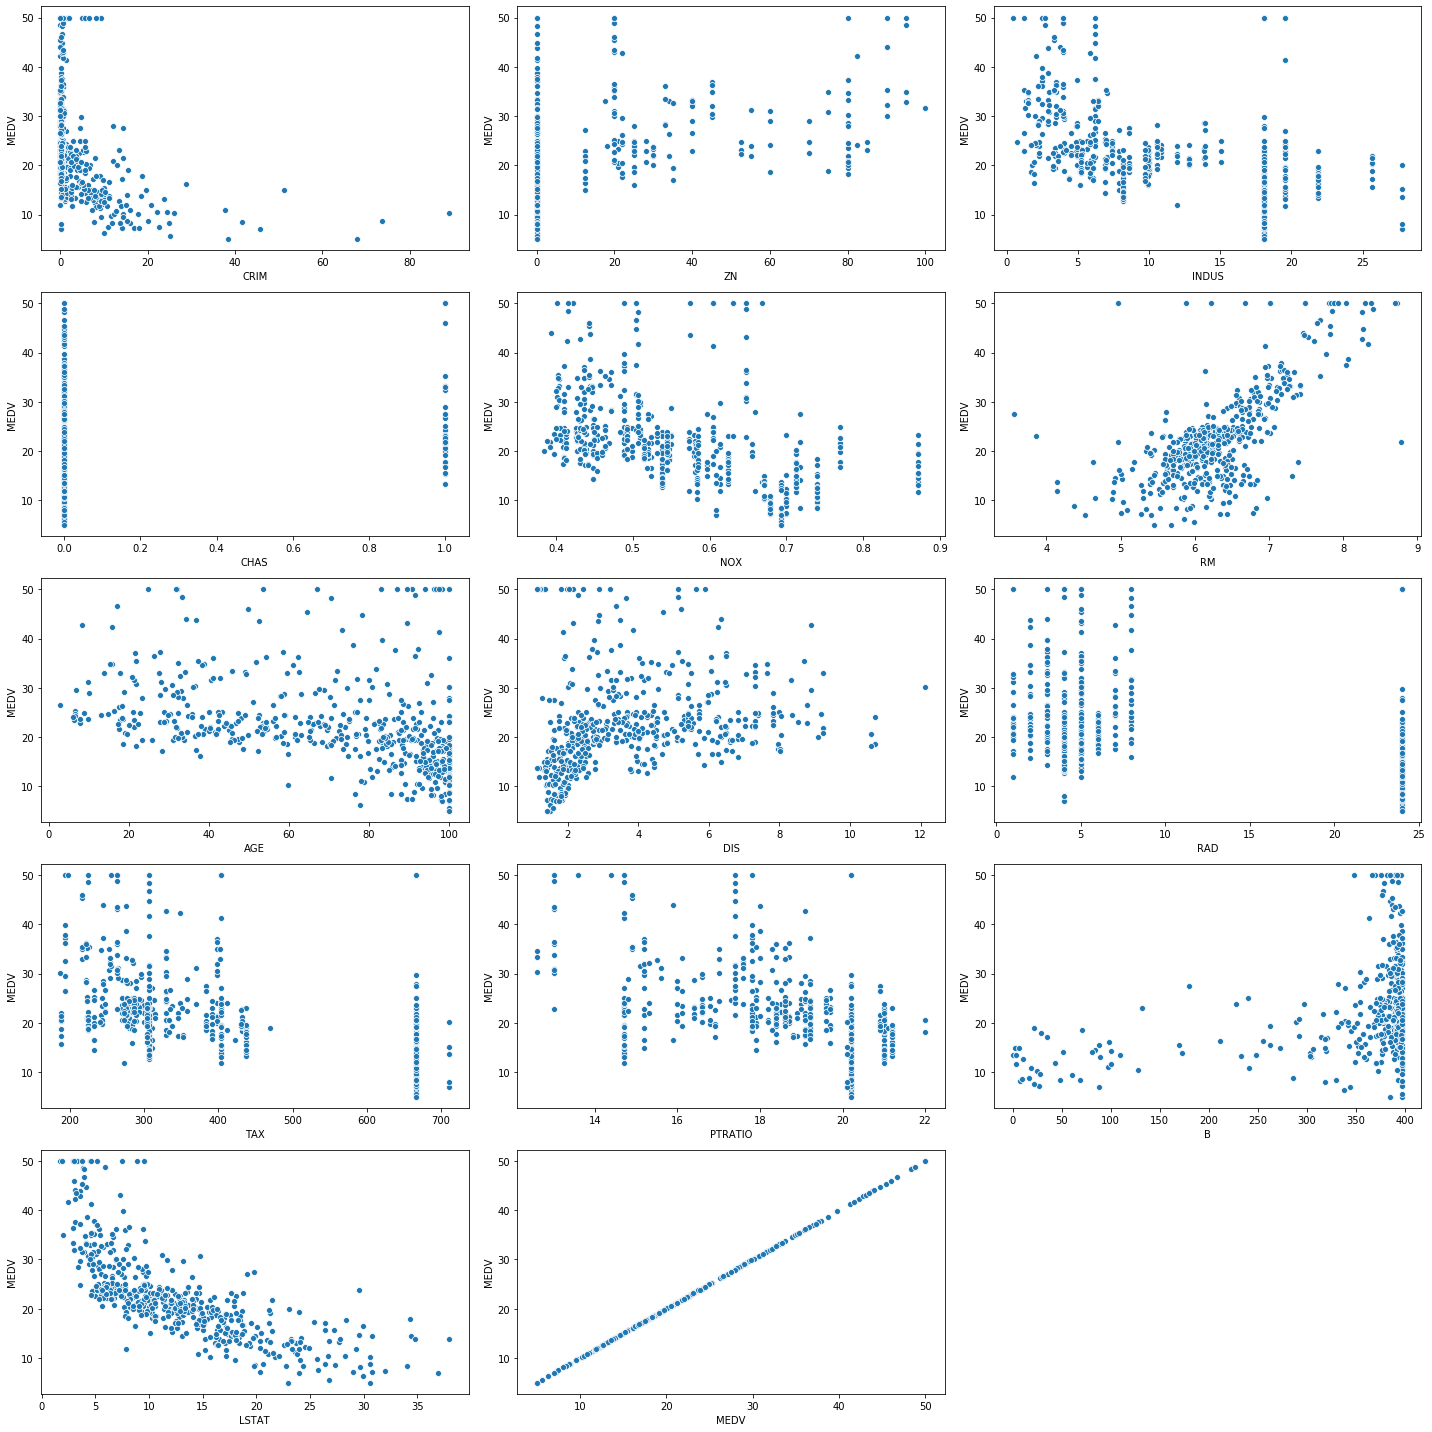

In [10]:
plt.figure(figsize=(20,20))
plotnumber = 1
for col in X:
    if plotnumber <= 15:
        plt.subplot(5,3,plotnumber)
        sns.scatterplot(X[col],y["MEDV"])
    plotnumber = plotnumber + 1
plt.tight_layout()

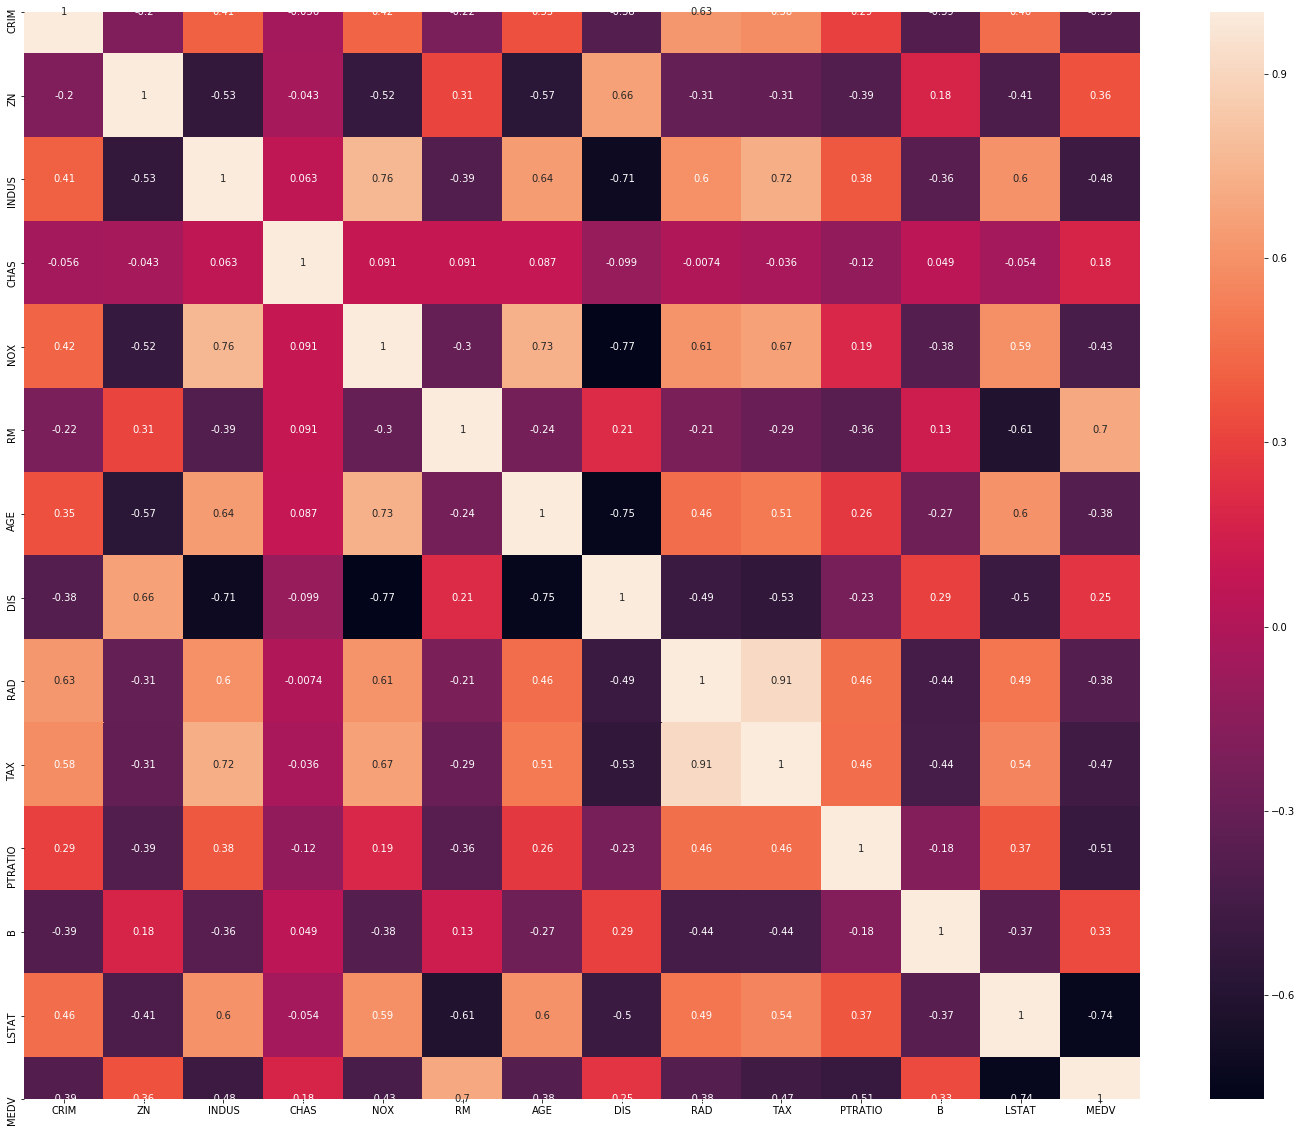

In [11]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),annot=True)

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
feature_columns = list(data.columns[:-1])

In [23]:
X = np.array(data[feature_columns])
y = np.array(data["MEDV"])

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
lr.score(X_train,y_train)

0.7430248871225487

In [64]:
lr.score(X_test,y_test)

0.7181173900062093

In [65]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, ElasticNetCV

In [66]:
elasticCV = ElasticNetCV(alphas=None,cv=10)
elasticCV.fit(X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [67]:
elasticCV.alpha_

1.4842832663464363

In [68]:
elasticCV.l1_ratio_

0.5

In [69]:
e_lr = ElasticNet(alpha=elasticCV.alpha_, l1_ratio=elasticCV.l1_ratio_)
e_lr.fit(X_train,y_train)

ElasticNet(alpha=1.4842832663464363, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [70]:
e_lr.score(X_test,y_test)

0.6387205261764304

In [71]:
lassoCV = LassoCV(alphas=None,cv=10,normalize=True)
lassoCV.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [72]:
l_lr = Lasso(alpha=lassoCV.alpha_)
l_lr.fit(X_train,y_train)

Lasso(alpha=0.0015084681986438002, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
l_lr.score(X_test,y_test)

0.7185226244998247

In [74]:
alpha = np.random.uniform(0,10,size=(50,))
ridgeCV = RidgeCV(alphas=alpha,cv=10,normalize=True)
ridgeCV.fit(X_train,y_train)

C:\Users\fuzel1999\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([7.39458488, 7.96638147, 5.79515807, 1.07949588, 6.01188158,
       0.36954314, 5.31369396, 5.6881773 , 4.41583421, 6.09074195,
       1.18002036, 8.95210076, 0.79753023, 2.37220889, 4.84599705,
       7.09067433, 1.76322338, 6.41310281, 2.56317947, 8.07081128,
       0.91741312, 9.68076048, 0.8583339 , 0.40402111, 1.93795176,
       7.86202692, 7.95179292, 3.3974671 , 5.94086461, 4.78543428,
       8.40229161, 6.57393444, 6.55436091, 9.94395114, 6.12167489,
       9.71779218, 1.60534398, 5.42328268, 7.2988577 , 1.15599899,
       7.56775973, 4.82273188, 6.16362162, 3.00834016, 2.29893123,
       6.36969216, 3.62549405, 3.04151803, 7.12447588, 7.68669343]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [75]:
ridgeCV.alpha_

0.3695431369873303

In [76]:
r_lr = Ridge(alpha=ridgeCV.alpha_)
r_lr.fit(X_train,y_train)

Ridge(alpha=0.3695431369873303, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [77]:
r_lr.score(X_test,y_test)

0.7194888336346479